# Case Study - I

## firstly importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing data

In [2]:
df = pd.read_csv('data_regression.csv')

In [3]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


## Exploratory Data Analysis

In [4]:
df.shape

(2000, 16)

## Attributes in the data

In [5]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

## Dropping unnecessary columns

In [6]:
df.drop(['customer_id','phone_no'],axis = 1, inplace = True)

In [7]:
df.head()

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [8]:
df.year.value_counts()

year
2015    2000
Name: count, dtype: int64

In [9]:
df.drop('year', axis = 1, inplace = True)

In [10]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


## Overall information of the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1976 non-null   object 
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   mail_subscribed         2000 non-null   object 
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   1972 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 203.3+ KB


In [12]:
# check for missing values.

In [13]:
df.isna().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [14]:
# churn is the needed column so dropping the rows which it has null values

In [15]:
ind = df[df.churn.isna()].index
ind

Index([  81,   82,  120,  121,  156,  157,  194,  195,  228,  290,  291,  364,
        365,  410,  451,  452,  495,  535,  536,  537,  538,  676,  677,  678,
        767,  768,  813,  875,  876,  910,  911,  915, 1993, 1994, 1995],
      dtype='int64')

In [16]:
df=df.drop(ind).reset_index(drop=True)
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [17]:
df.shape

(1965, 13)

In [18]:
df.isna().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     26
customer_support_calls     0
churn                      0
dtype: int64

## Gender column

In [19]:
df.gender.value_counts().index[0]

'Male'

In [20]:
df.gender.fillna(df.gender.mode()[0],inplace = True)

In [21]:
df.isna().sum()

gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     26
customer_support_calls     0
churn                      0
dtype: int64

## Maximum Days inactive column

In [22]:
df.maximum_days_inactive.describe()

count    1939.000000
mean        3.249613
std         0.805421
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: maximum_days_inactive, dtype: float64

In [23]:
df.maximum_days_inactive.nunique()

7

In [24]:
df.maximum_days_inactive.value_counts()

maximum_days_inactive
3.0    931
4.0    634
2.0    269
5.0     82
1.0     12
0.0      9
6.0      2
Name: count, dtype: int64

In [25]:
# it is a categorical type column. So mode can be used to fill the missing values

In [26]:
df.maximum_days_inactive.mode()[0]

3.0

In [27]:
df.maximum_days_inactive.fillna(df.maximum_days_inactive.mode()[0], inplace = True)

In [28]:
df.isna().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

## Data is now somewhat clean without missing values

## now lets check outliers

In [29]:
# z-score method
# Quantile method
# IQR method
# Visual representation

In [30]:
# quantile method: any value that is less than 1 percentile value or any value greater than 99 percentile value is an outlier

In [31]:
df.age.quantile([0.01,0.99])

0.01    21.0
0.99    70.0
Name: age, dtype: float64

In [32]:
df.age.describe()

count    1965.000000
mean       38.697710
std        10.196352
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        82.000000
Name: age, dtype: float64

In [33]:
df[(df.age<21)|(df.age>70)]

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
268,Female,19,121,no,yes,297.60,5.8,33.73,77,3,2.0,3,1.0
271,Male,76,153,no,no,290.70,8.5,32.95,108,3,3.0,1,0.0
471,Male,75,56,no,no,295.50,10.6,33.49,91,6,3.0,2,0.0
489,Male,20,193,no,no,145.20,10.9,16.46,115,5,3.0,2,1.0
513,Female,74,119,no,no,390.15,10.0,44.22,89,2,3.0,1,1.0
556,Male,77,184,no,no,354.60,13.8,40.19,94,4,4.0,1,1.0
614,Female,20,53,no,no,253.20,10.9,28.70,113,2,3.0,0,0.0
658,Female,82,122,yes,no,346.35,11.0,39.25,57,2,3.0,0,1.0
702,Male,74,161,no,no,267.15,8.5,30.28,78,2,3.0,1,0.0
805,Female,80,62,no,no,373.05,13.2,42.28,78,2,4.0,1,1.0


## IQR Method

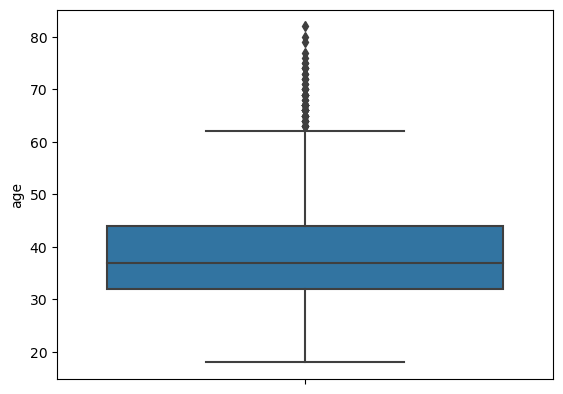

In [35]:
sns.boxplot(y = 'age', data = df)
plt.show()

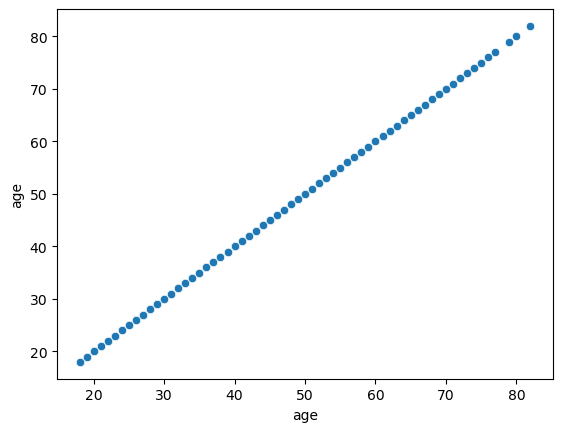

In [36]:
sns.scatterplot(x = 'age', y='age',data = df)
plt.show()

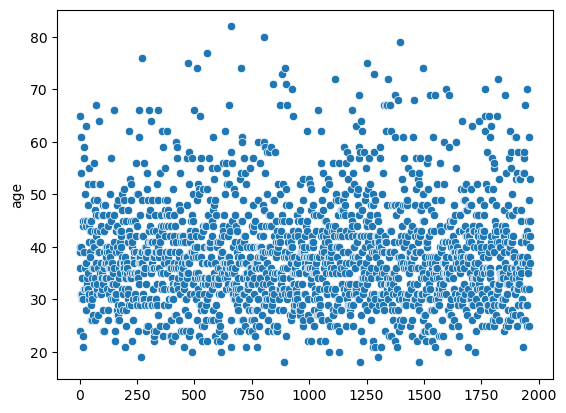

In [37]:
sns.scatterplot(x = df.age.index, y = df.age, data = df)
plt.show()

In [38]:
# as we can find the outliers we have to treat them by removing them if necessary.

In [39]:
df.columns

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

In [40]:
# we only treat outliers for numeric continuous columns only and not for object columns

In [41]:
num_cols = []
for i in df:
    if df[i].dtype!=object and df[i].nunique()>10:
        num_cols.append(i)

In [42]:
num_cols

['age',
 'no_of_days_subscribed',
 'weekly_mins_watched',
 'minimum_daily_mins',
 'maximum_daily_mins',
 'weekly_max_night_mins',
 'videos_watched']

## Now plotting the boxplot for all the columns simultaneously 

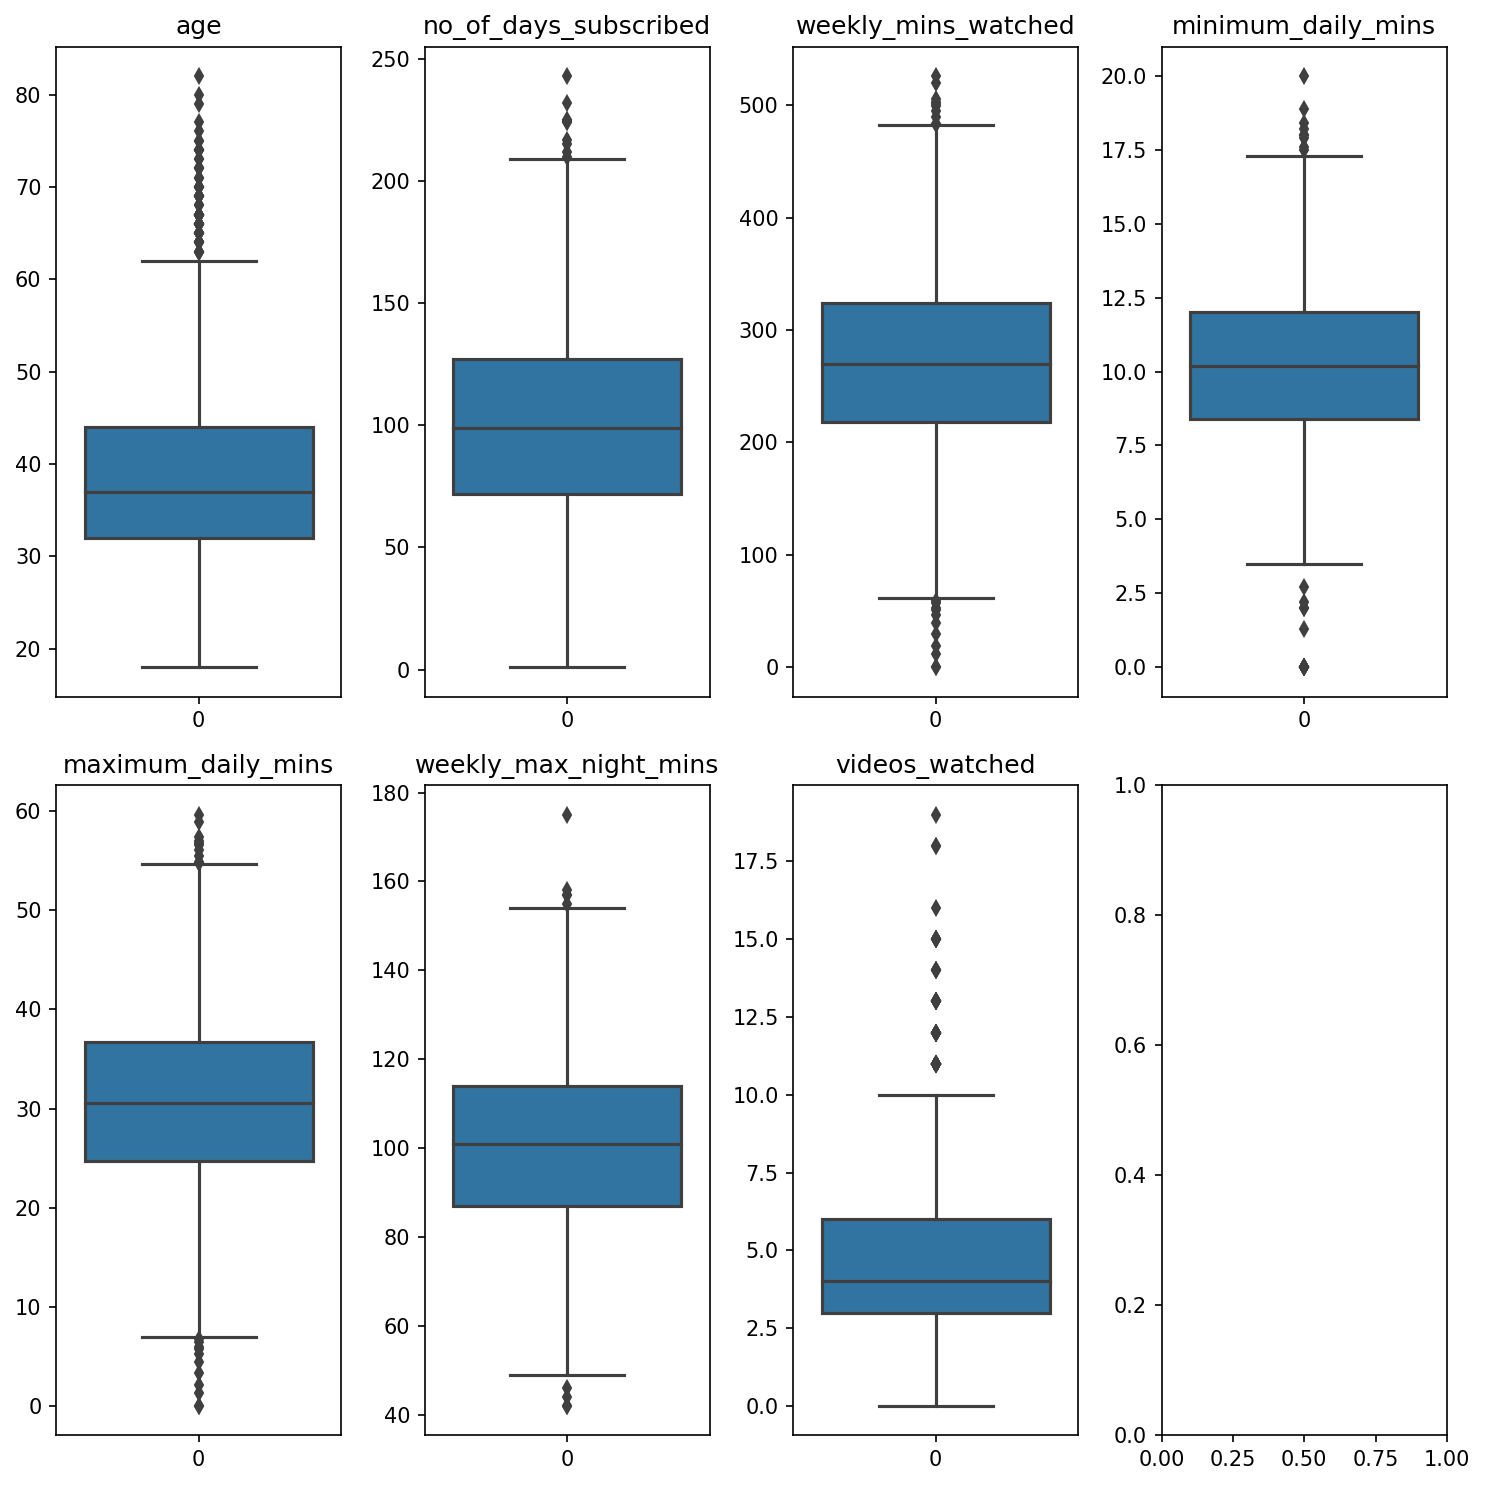

In [43]:
f,a=plt.subplots(2,4,figsize = (10,10), dpi = 150)
ind = 0
try:
    for i in range(2):
        for j in range(4):
            sns.boxplot(df[num_cols[ind]], ax = a[i,j])
            a[i,j].set_title(num_cols[ind])
            ind+=1
except:
    pass

plt.tight_layout()
plt.show()

In [44]:
# now trying to remove the outliers

In [45]:
q1 = df.age.quantile(0.25)
q3 = df.age.quantile(0.75)

print('q1-', q1)
print('q3-', q3)

iqr= q3-q1
print('iqr-', iqr)

upper = q3+1.5*iqr
lower = q1-1.5*iqr

print('lower', lower)
print('upper', upper)

q1- 32.0
q3- 44.0
iqr- 12.0
lower 14.0
upper 62.0


In [46]:
df.age.describe()

count    1965.000000
mean       38.697710
std        10.196352
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        82.000000
Name: age, dtype: float64

In [47]:
# we shall clip the outliers

In [48]:
df.age.clip(lower,upper, inplace = True)

In [49]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,62,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1961,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1962,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1963,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [50]:
df.age.describe()

count    1965.000000
mean       38.482443
std         9.580792
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        62.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

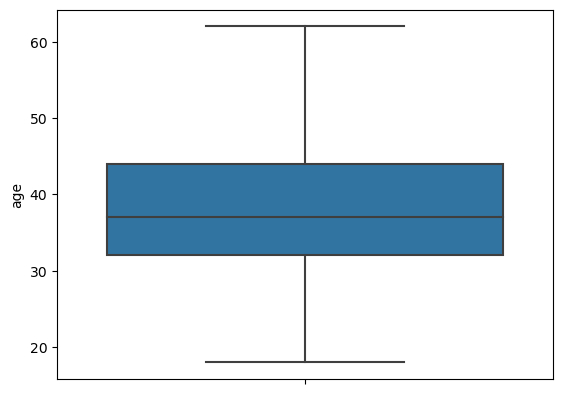

In [51]:
sns.boxplot(y = df.age, data = df)

In [53]:
# we shall define an out_cap function to apply the clip function for all the remaining columns

In [54]:
def out_cap(col):
    q1= df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    iqr = q3-q1
    
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    
    df[col].clip(lower, upper, inplace = True)

In [55]:
for i in num_cols:
    out_cap(i)

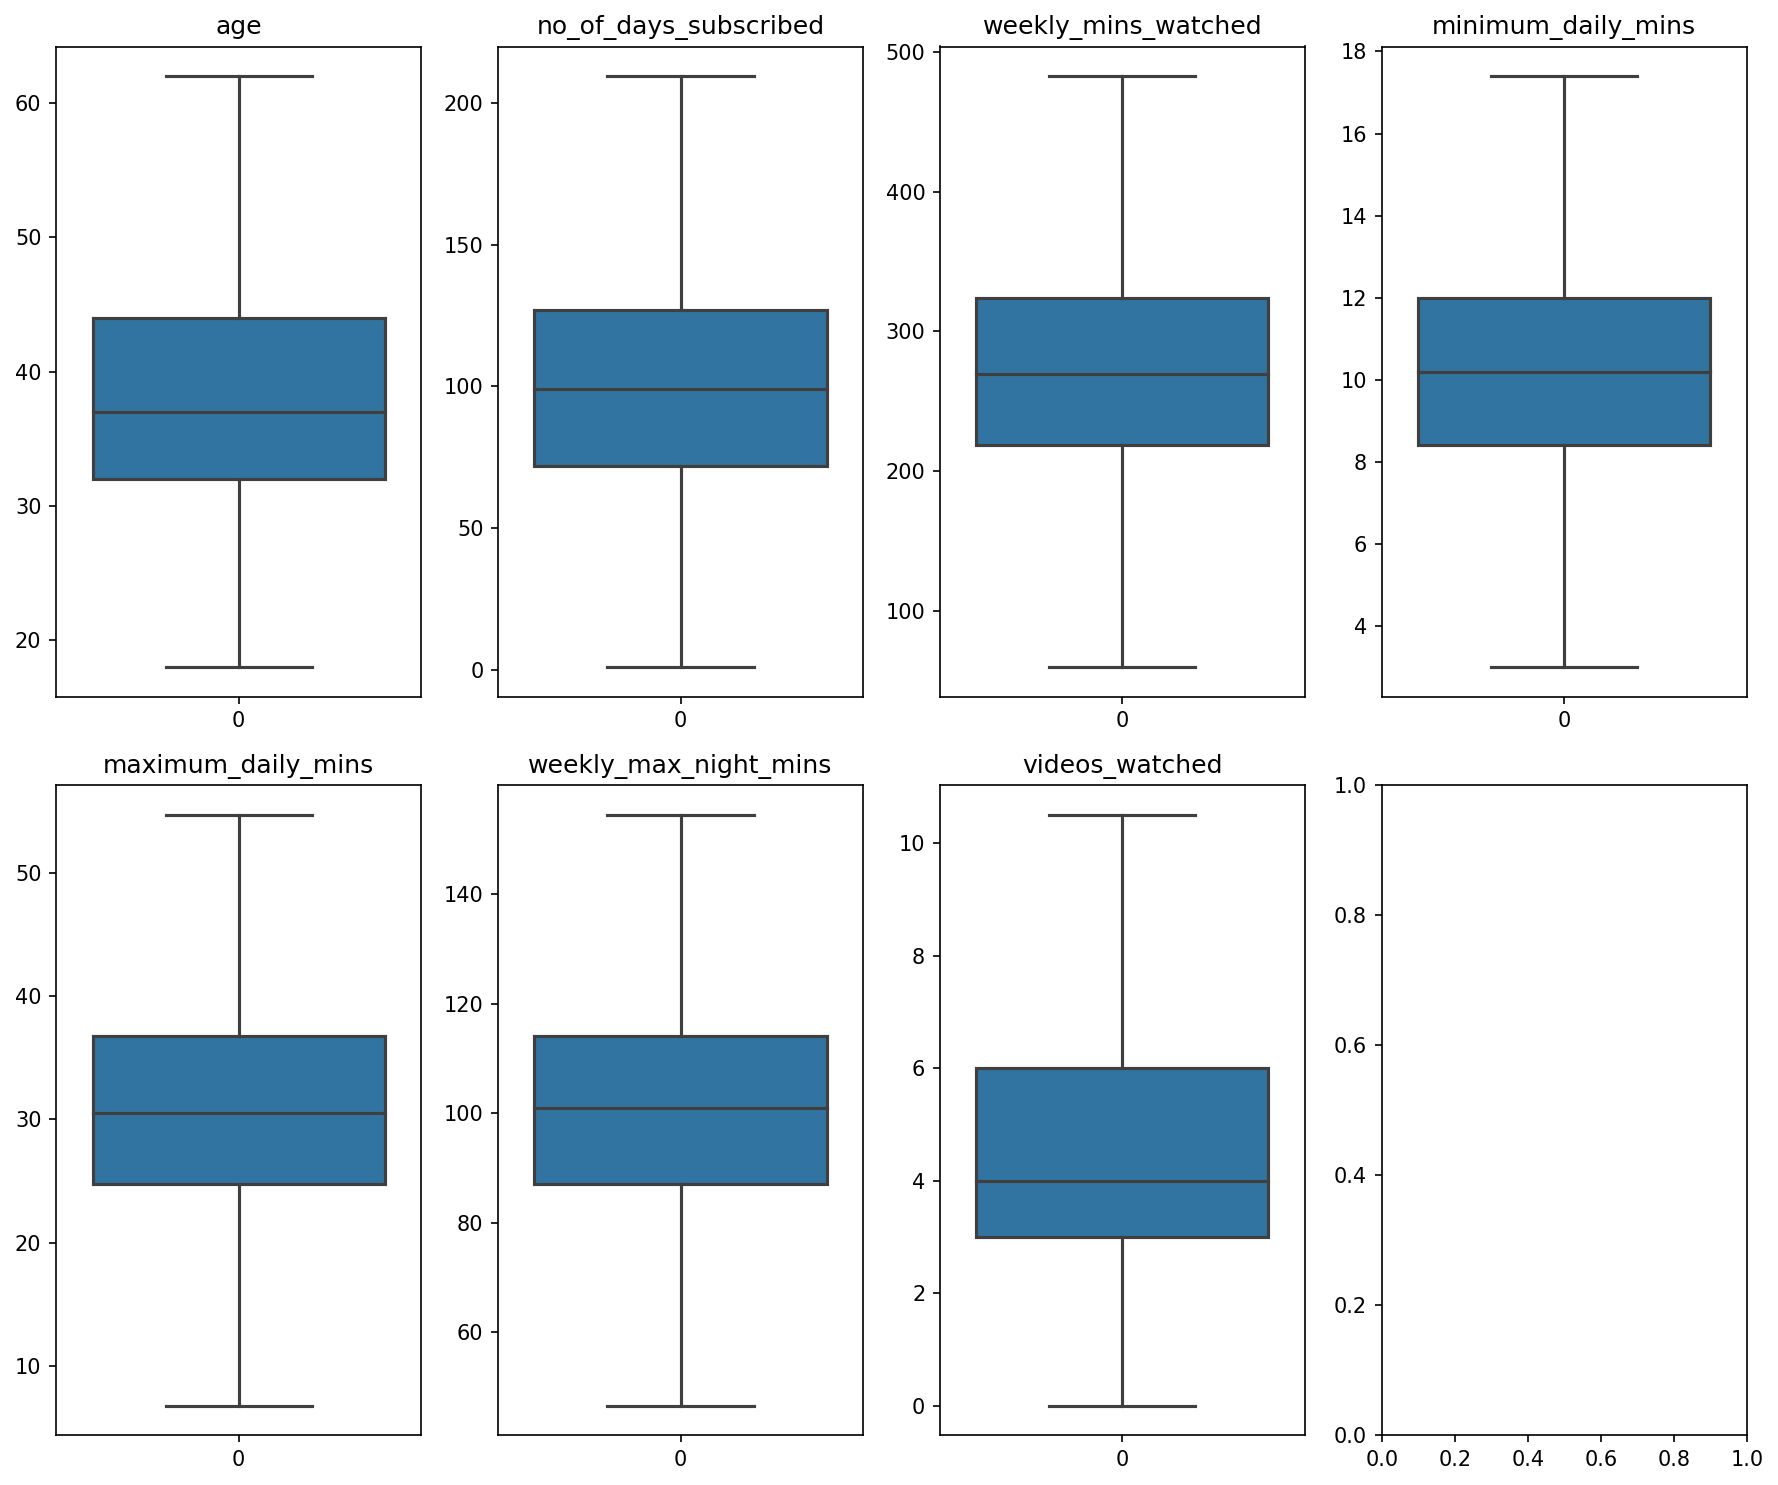

In [59]:
f,a = plt.subplots(2,4,figsize = (12,10),dpi= 150)

ind = 0

try:
    for i in range(2):
        for j in range(4):
            sns.boxplot(df[num_cols[ind]],ax = a[i,j])
            a[i,j].set_title(num_cols[ind])
            ind+=1
except:
    pass
plt.tight_layout()
plt.show()

# CAP using quantile method Example

In [60]:
def quant_cap(col):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(.99)
    df[col].clip(lower, upper, inplace = True)

In [64]:
lst = [np.random.random(10) for i in range(4)]
lst

[array([0.6103975 , 0.70803444, 0.97954742, 0.2322796 , 0.0045615 ,
        0.48452269, 0.56269174, 0.7476001 , 0.6030429 , 0.31898551]),
 array([0.90898548, 0.60807043, 0.27332844, 0.29449537, 0.3014804 ,
        0.30159156, 0.2287097 , 0.69335716, 0.08904574, 0.3907275 ]),
 array([0.23239499, 0.71586274, 0.52087945, 0.23879823, 0.25170341,
        0.91317536, 0.14331329, 0.89467672, 0.64159869, 0.50381641]),
 array([0.39108347, 0.99879984, 0.68153699, 0.67751014, 0.37560493,
        0.77502051, 0.6595867 , 0.32563344, 0.5272068 , 0.18281797])]

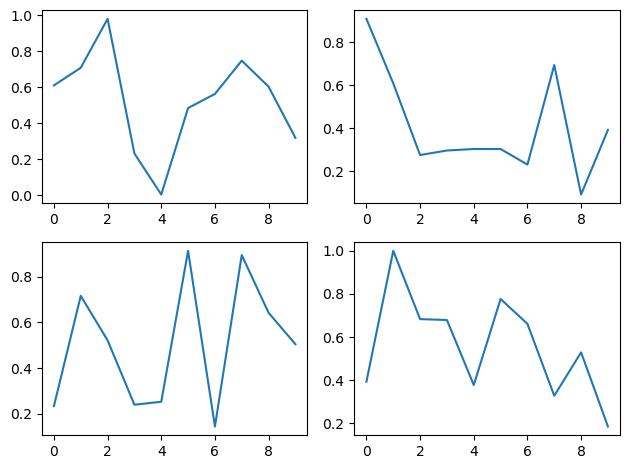

In [65]:
f,a=plt.subplots(2,2)

ind = 0
for i in range(2):
    for j in range(2):
        a[i,j].plot(lst[ind])
        ind+=1
        
plt.tight_layout()
plt.show()

## Correlation

In [66]:
df.corr(numeric_only=True)

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
age,1.000000,0.033913,0.015971,-0.004880,0.015984,0.014682,0.004089,0.003352,-0.005279,0.003063
no_of_days_subscribed,0.033913,1.000000,0.000147,0.018217,0.000138,-0.002802,0.023982,0.019883,0.010239,0.002073
weekly_mins_watched,0.015971,0.000147,1.000000,-0.022654,1.000000,0.036597,0.020514,-0.019117,-0.037955,0.164739
minimum_daily_mins,-0.004880,0.018217,-0.022654,1.000000,-0.022656,0.013764,0.046286,0.917371,-0.003139,0.066190
maximum_daily_mins,0.015984,0.000138,1.000000,-0.022656,1.000000,0.036593,0.020511,-0.019120,-0.037967,0.164729
weekly_max_night_mins,0.014682,-0.002802,0.036597,0.013764,0.036593,1.000000,-0.000288,0.033304,-0.010780,0.006142
videos_watched,0.004089,0.023982,0.020514,0.046286,0.020511,-0.000288,1.000000,0.035961,0.004853,-0.023404
maximum_days_inactive,0.003352,0.019883,-0.019117,0.917371,-0.019120,0.033304,0.035961,1.000000,-0.000268,0.045764
customer_support_calls,-0.005279,0.010239,-0.037955,-0.003139,-0.037967,-0.010780,0.004853,-0.000268,1.000000,0.208271
churn,0.003063,0.002073,0.164739,0.066190,0.164729,0.006142,-0.023404,0.045764,0.208271,1.000000


<Axes: >

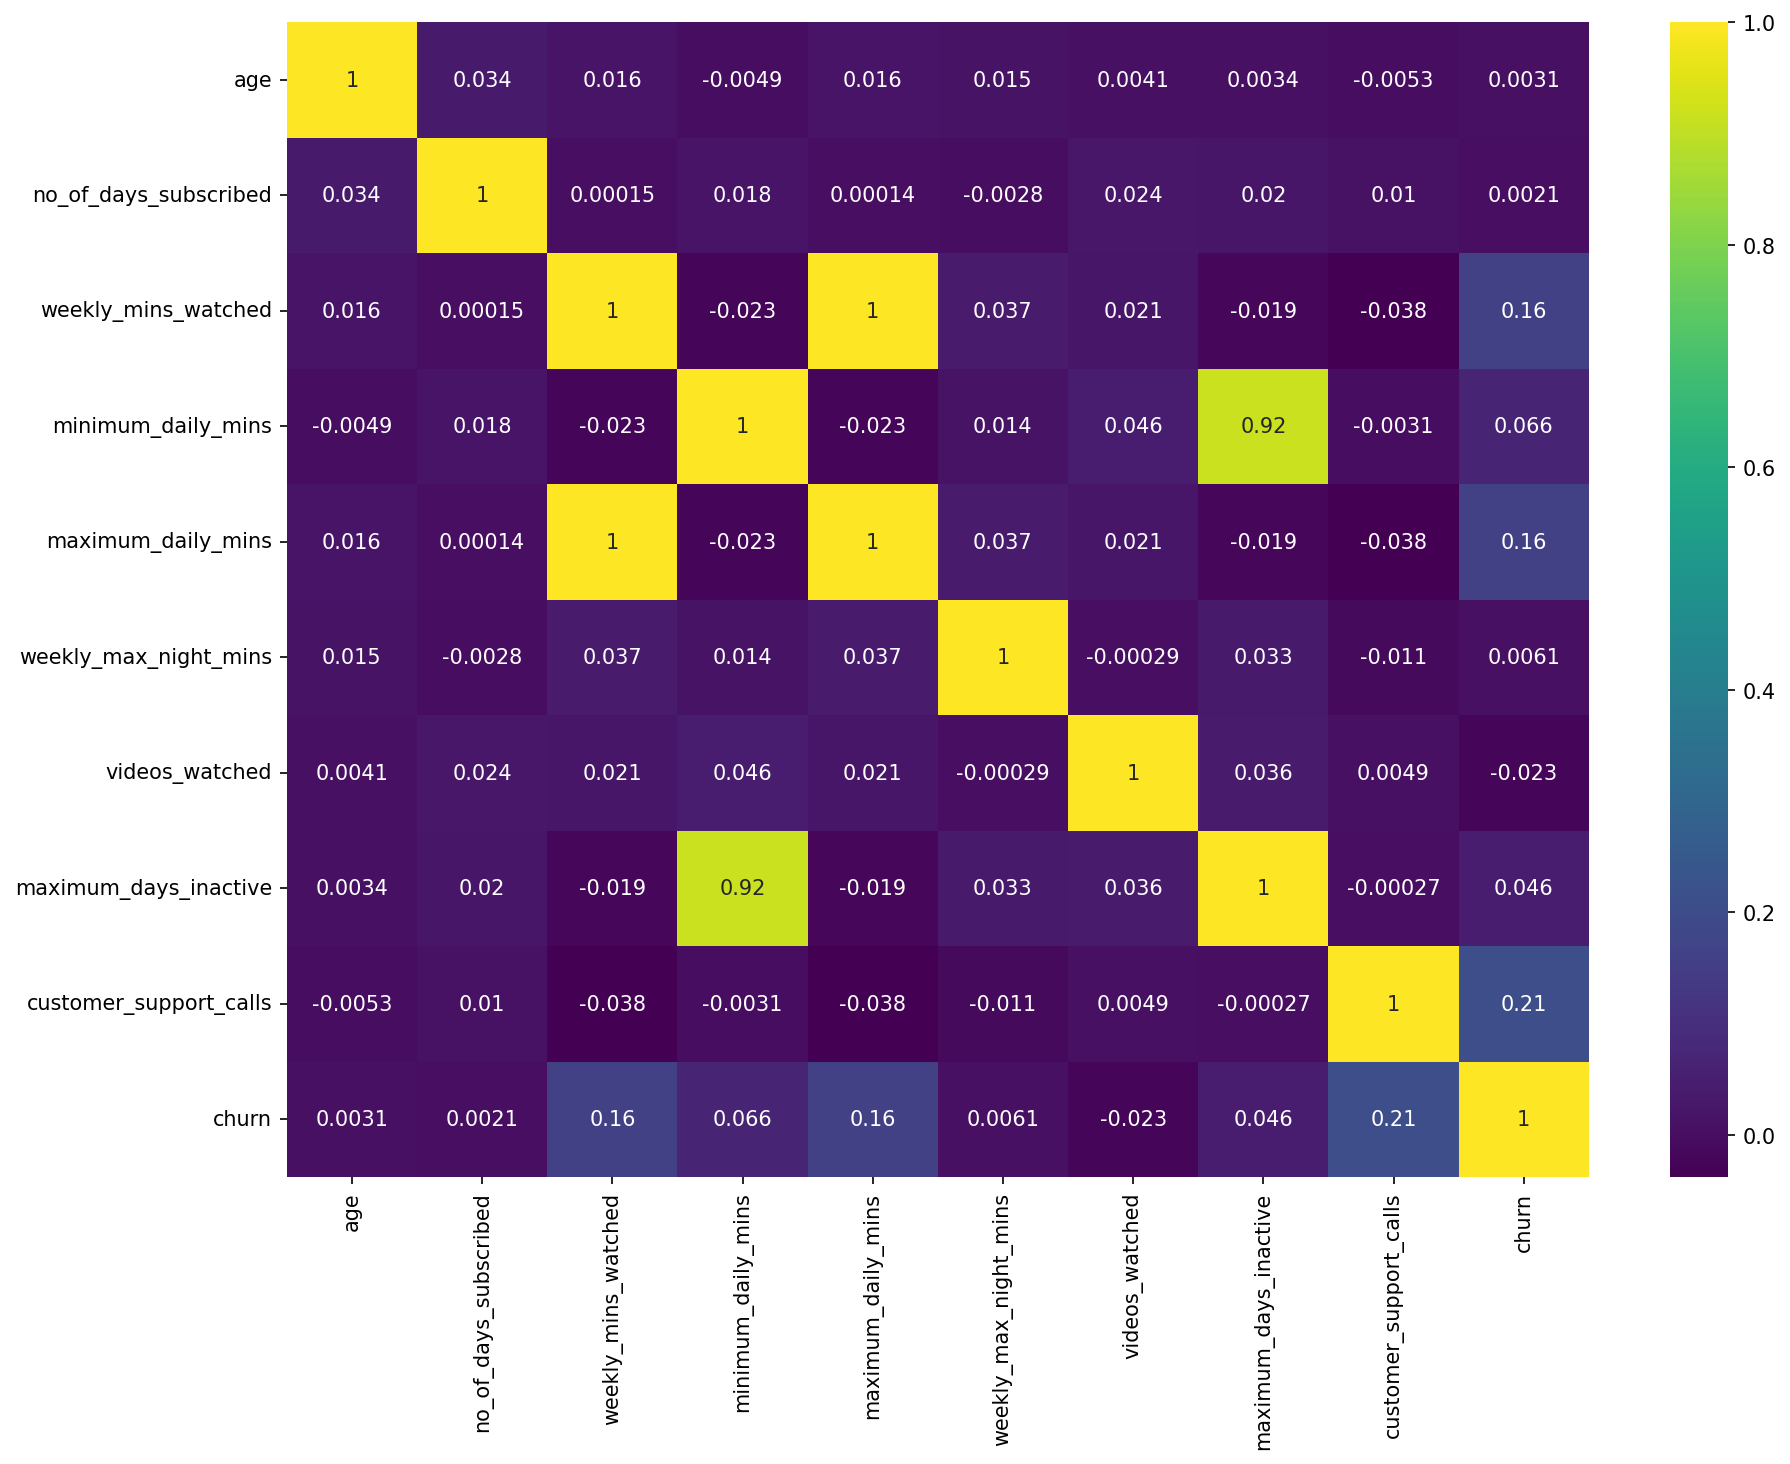

In [68]:
plt.figure(figsize = (14,10), dpi = 150)
sns.heatmap(df.corr(numeric_only=True), cmap = 'viridis', annot = True, fmt = '.2g')

In [ ]:
# we can drop highly correlated columns, so it gives the same learning to the algorithm which one is enough.

In [69]:
# maximum days inactive vs minimum daily minutes
# maximum daily minutes vs weekly minutes watched

<Axes: >

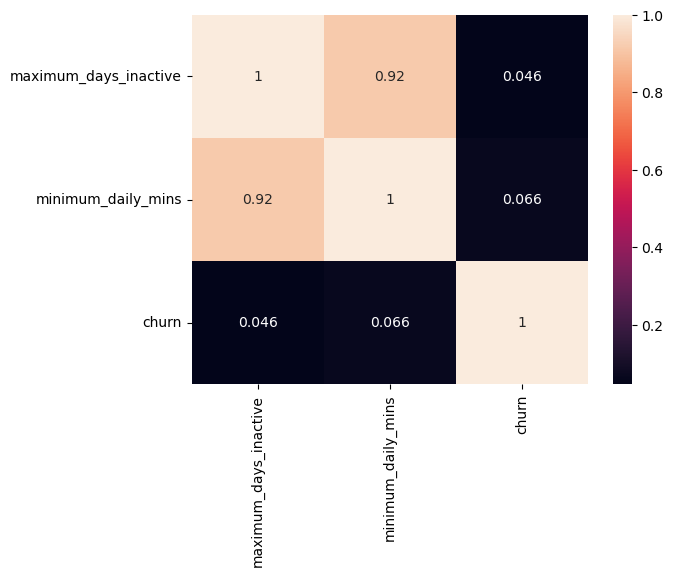

In [70]:
sns.heatmap(df[['maximum_days_inactive', 'minimum_daily_mins', 'churn']].corr(), annot = True)

In [71]:
# dropping the column with less correlation

<Axes: >

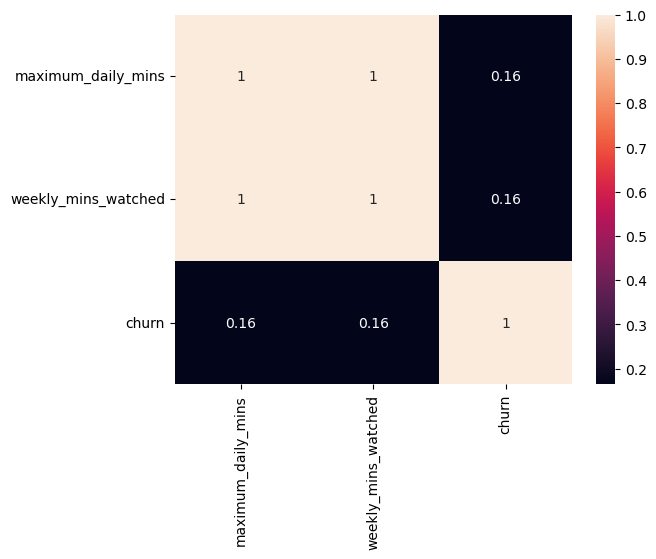

In [75]:
sns.heatmap(df[['maximum_daily_mins', 'weekly_mins_watched', 'churn']].corr(), annot = True)

In [76]:
# both have same corellation so can drop any column

In [77]:
# lets drop maximum_days_inactive and weeklY_mins_watched

In [79]:
df.drop(['maximum_days_inactive', 'weekly_mins_watched'], axis = 1, inplace = True)

In [80]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,Female,36,62.0,no,no,12.2,16.81,82.0,1.0,1,0.0
1,Female,39,149.0,no,no,7.7,33.37,87.0,3.0,2,0.0
2,Female,62,126.0,no,no,11.9,9.89,91.0,1.0,5,1.0
3,Female,24,131.0,no,yes,9.5,36.41,102.0,4.0,3,0.0
4,Female,40,191.0,no,no,10.9,27.54,83.0,7.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1960,Female,42,119.0,no,yes,7.6,20.03,76.0,3.0,3,0.0
1961,Male,45,127.0,no,no,9.3,30.99,116.0,3.0,1,0.0
1962,Male,53,94.0,no,no,15.6,14.60,110.0,10.5,0,0.0
1963,Male,40,94.0,no,no,10.4,20.18,100.0,6.0,3,0.0


## Encoding

In [81]:
# Object columns to numeric

In [91]:
obj = df.select_dtypes('object')
obj

,gender,multi_screen,mail_subscribed
0,Female,no,no
1,Female,no,no
2,Female,no,no
3,Female,no,yes
4,Female,no,no
...,...,...,...
1960,Female,no,yes
1961,Male,no,no
1962,Male,no,no
1963,Male,no,no


In [84]:
# its like converting male = 1 and female = 0

## one hot encoding

In [92]:
obj = pd.get_dummies(obj, columns = ['gender', 'multi_screen', 'mail_subscribed'], dtype= int)
obj.head()

,gender_Female,gender_Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,1,0,1,0,1,0
1,1,0,1,0,1,0
2,1,0,1,0,1,0
3,1,0,1,0,0,1
4,1,0,1,0,1,0


In [94]:
num = df.select_dtypes('number')
num.head()

,age,no_of_days_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,36,62.0,12.2,16.81,82.0,1.0,1,0.0
1,39,149.0,7.7,33.37,87.0,3.0,2,0.0
2,62,126.0,11.9,9.89,91.0,1.0,5,1.0
3,24,131.0,9.5,36.41,102.0,4.0,3,0.0
4,40,191.0,10.9,27.54,83.0,7.0,1,0.0


## final features

In [96]:
pd.concat((num,obj), axis = 1)

,age,no_of_days_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn,gender_Female,gender_Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,36,62.0,12.2,16.81,82.0,1.0,1,0.0,1,0,1,0,1,0
1,39,149.0,7.7,33.37,87.0,3.0,2,0.0,1,0,1,0,1,0
2,62,126.0,11.9,9.89,91.0,1.0,5,1.0,1,0,1,0,1,0
3,24,131.0,9.5,36.41,102.0,4.0,3,0.0,1,0,1,0,0,1
4,40,191.0,10.9,27.54,83.0,7.0,1,0.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,42,119.0,7.6,20.03,76.0,3.0,3,0.0,1,0,1,0,0,1
1961,45,127.0,9.3,30.99,116.0,3.0,1,0.0,0,1,1,0,1,0
1962,53,94.0,15.6,14.60,110.0,10.5,0,0.0,0,1,1,0,1,0
1963,40,94.0,10.4,20.18,100.0,6.0,3,0.0,0,1,1,0,1,0
